In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline
import json 

In [2]:
#import cleaned data
movie_data=pd.read_csv("clean_data.csv")
#display data
movie_data.head()


,BUDGET,POPULARITY,REVENUE,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month
0,200000000,936.725,57000000,7.3,2445,2020,4
1,17000000,641.633,35878266,7.1,602,2020,7
2,75000000,361.237,201858461,7.2,6022,2020,5
3,90000000,337.346,419074646,7.2,5392,2020,1
4,42000000,253.895,30234182,7.0,3216,2020,5


In [3]:
#display data info
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BUDGET         6667 non-null   int64  
 1   POPULARITY     6667 non-null   float64
 2   REVENUE        6667 non-null   int64  
 3   VOTE_AVERAGE   6667 non-null   float64
 4   VOTE_COUNT     6667 non-null   int64  
 5   release_year   6667 non-null   int64  
 6   release_month  6667 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 364.7 KB


In [4]:
#display described data
movie_data.describe()

,BUDGET,POPULARITY,REVENUE,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month
count,6.667000e+03,6667.000000,6.667000e+03,6667.000000,6667.000000,6667.000000,6667.000000
mean,2.969841e+07,18.019543,8.706004e+07,6.393160,1528.171891,2000.409030,6.799010
std,3.998175e+07,24.039510,1.726639e+08,0.920299,2605.084609,16.699905,3.499189
min,1.000000e+00,0.600000,1.000000e+00,0.000000,1.000000,1900.000000,1.000000
25%,5.000000e+06,8.768000,5.498476e+06,5.900000,143.000000,1994.000000,4.000000
50%,1.500000e+07,12.699000,2.581996e+07,6.400000,552.000000,2005.000000,7.000000
75%,3.675000e+07,20.225500,9.103752e+07,7.000000,1669.000000,2012.000000,10.000000
max,3.800000e+08,936.725000,2.797801e+09,10.000000,27342.000000,2020.000000,12.000000


NUMERICAL DATA
UNI VARIATE STAT


In [5]:
def Bi_Variate(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    # Draw jointplot of the two variables in the joined dataframe
    f = plt.figure(figsize=(24, 4))
    sb.jointplot(data = jointDF, x = var1, y = var2, height = 12)
    
   
   
def Correlation(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    f = plt.figure(figsize=(8, 4))
    sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
    
    
def Uni_Variate(data):
    
    data.describe()
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data = data, orient = "h", ax = axes[0])
    sb.boxplot(data = data, orient = "h", ax = axes[1])
    sb.histplot(data = data, ax = axes[2])

def PlotHist(data, var1: str, var2: str):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
    sb.histplot(movie_data['BUDGET'], ax=ax1, kde=True)
    sb.histplot(movie_data['REVENUE'], ax=ax2, kde=True)

def BoxPlot(movie_data, var: str):
    f = plt.figure(figsize=(24, 4))
    sb.boxplot(data = movie_data[var], orient = "h")

def ViolinPlot(movie_data, var: str):
    #Set up matplotlib figure with three subplots
    f, axes = plt.subplots(figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data=movie_data[var], orient = "h")
    
def fixskew(data):
    data = np.log(data + 1)

    f = plt.figure(figsize=(15,6))

    sb.histplot(data, kde=True)

PREDICTING REVENUE USING BUDGET

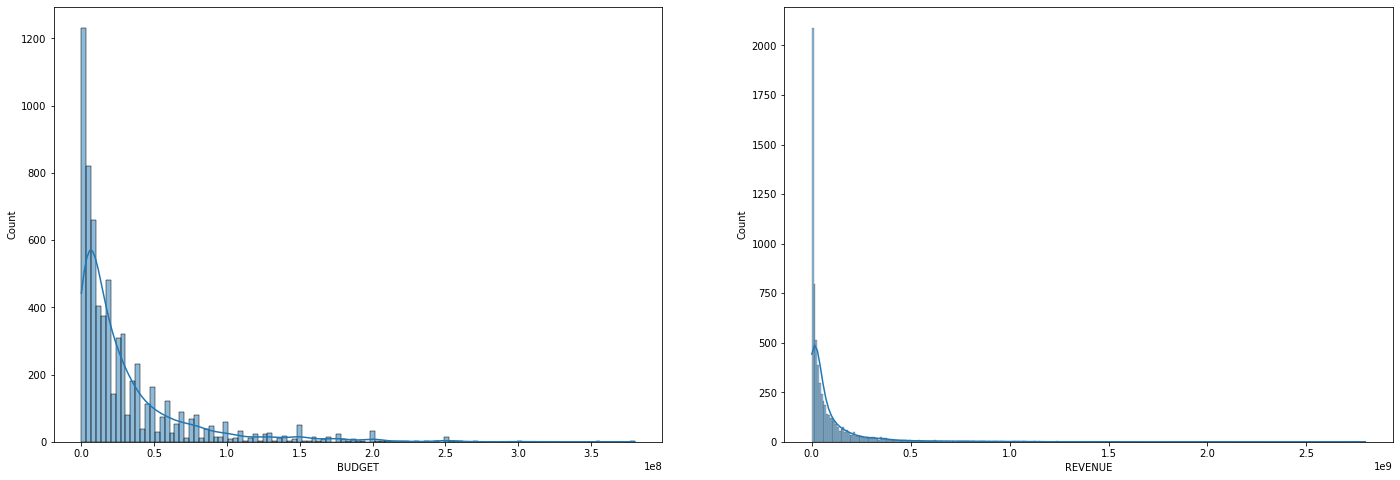

In [6]:
PlotHist(movie_data, "REVENUE", "BUDGET")

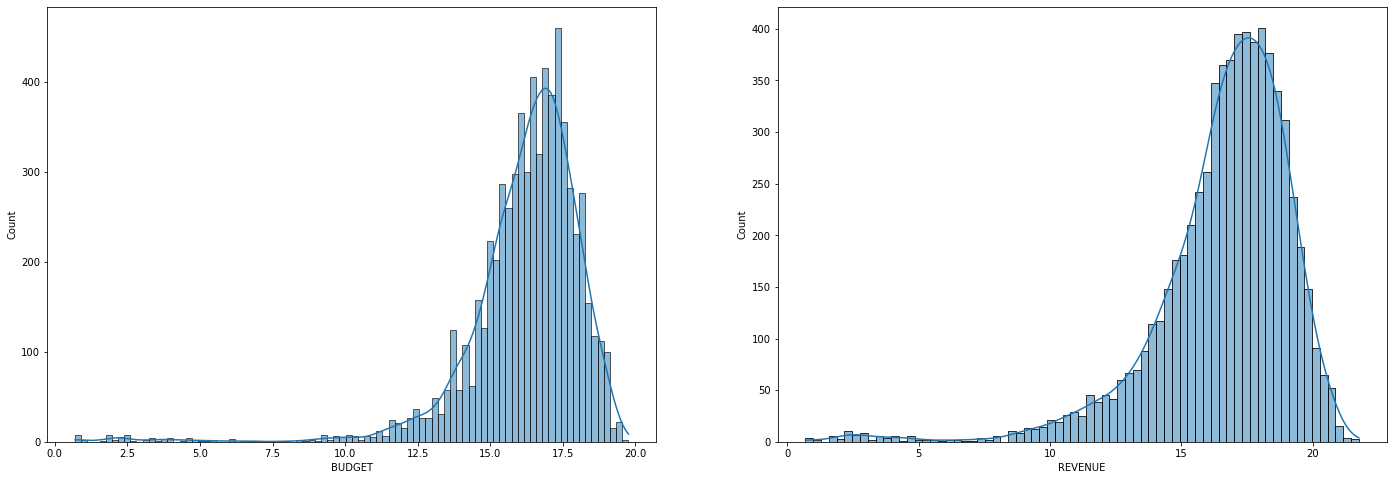

In [7]:
movie_data['BUDGET'] = np.log(movie_data['BUDGET'] + 1)
movie_data['REVENUE'] = np.log(movie_data['REVENUE'] + 1)

PlotHist(movie_data, "REVENUE", "BUDGET")

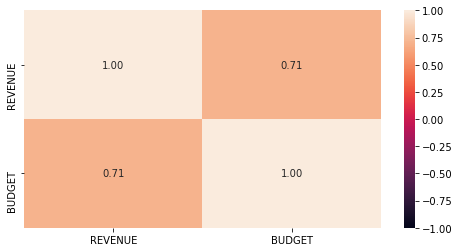

In [8]:
#Correlation between 2 variable/column
Correlation(movie_data, "REVENUE", "BUDGET")

<Figure size 1728x288 with 0 Axes>

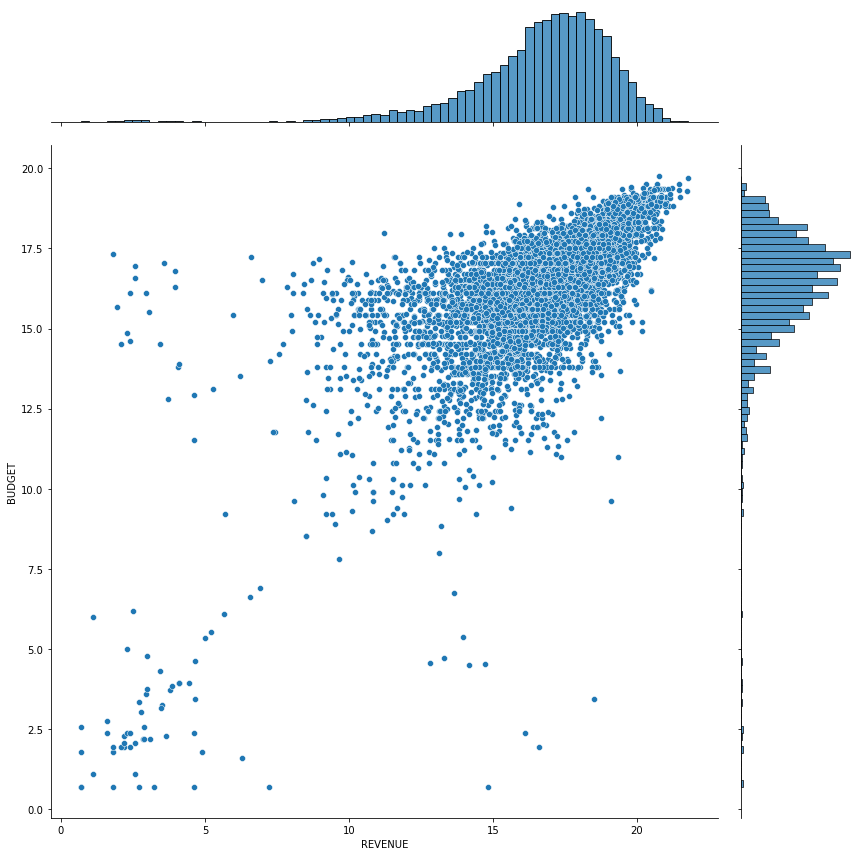

In [9]:
Bi_Variate(movie_data, "REVENUE", "BUDGET")

LINEAR REGRESSION FOR REVENUE AND BUDGET

In [10]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
LinearReg = LinearRegression()
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(movie_data['REVENUE'])
X = pd.DataFrame(movie_data['BUDGET'])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (5000, 1) (5000, 1)
Test Set  : (1667, 1) (1667, 1)


In [11]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [1.95380632]
Coefficients : a =  [[0.90306365]]


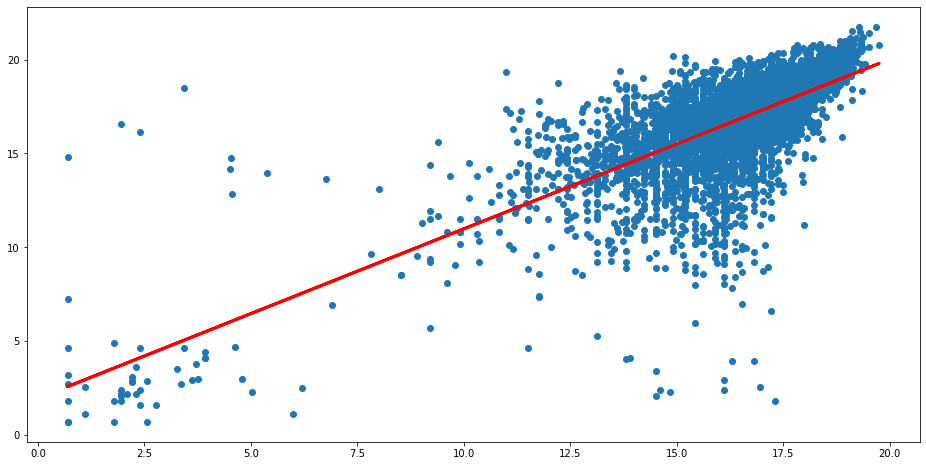

In [12]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

Goodness of Fit of the Linear Regression Model

In [13]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
train_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, train_y_pred))

Explained Variance (R^2) 	: 0.5045192554485737
Mean Squared Error (MSE) 	: 3.6111190775913338


Prediction of Response based on the Predictor

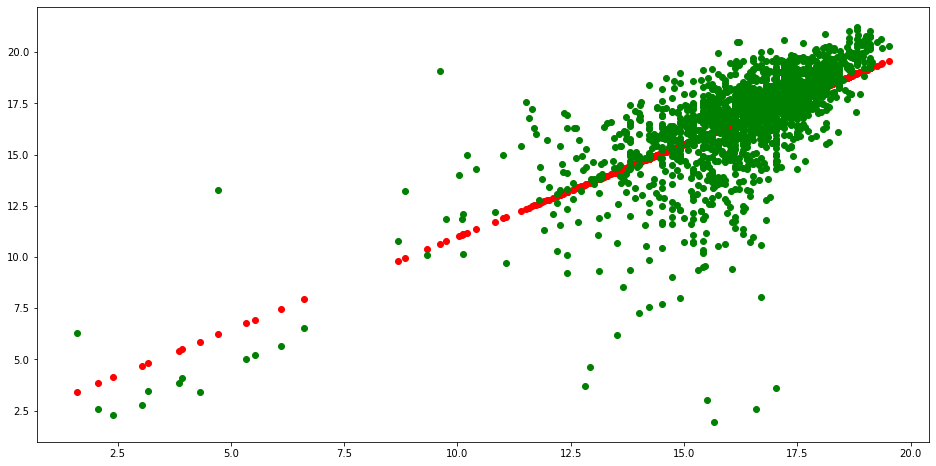

In [14]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

In [15]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y, test_y_pred))

Mean Squared Error (MSE) 	: 3.3518573798938243


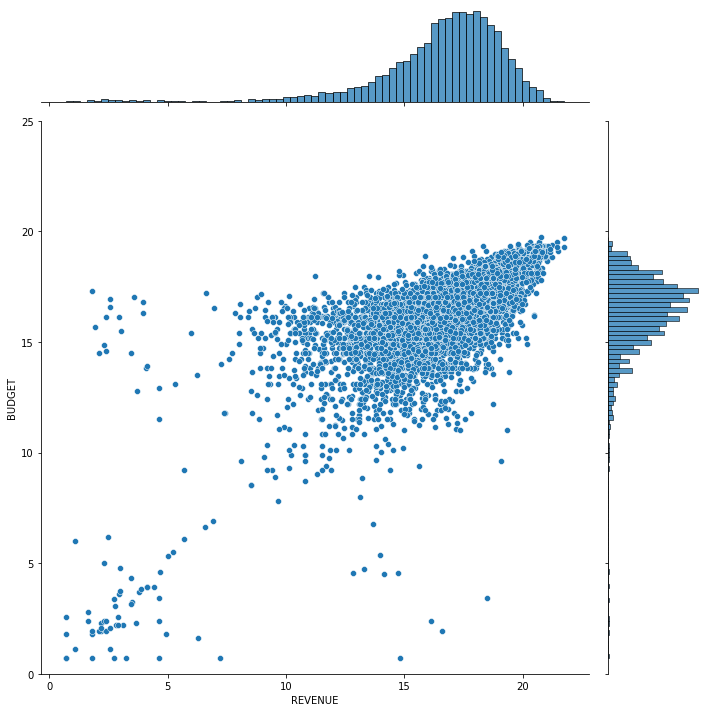

In [16]:
plot = sb.jointplot(data = movie_data, x = "REVENUE", y = "BUDGET", height = 10)

plot.ax_marg_y.set_ylim(0, 25)

plt.show()

2. POPULARITY

In [17]:
movie_data["POPULARITY"].describe()

count    6667.000000
mean       18.019543
std        24.039510
min         0.600000
25%         8.768000
50%        12.699000
75%        20.225500
max       936.725000
Name: POPULARITY, dtype: float64

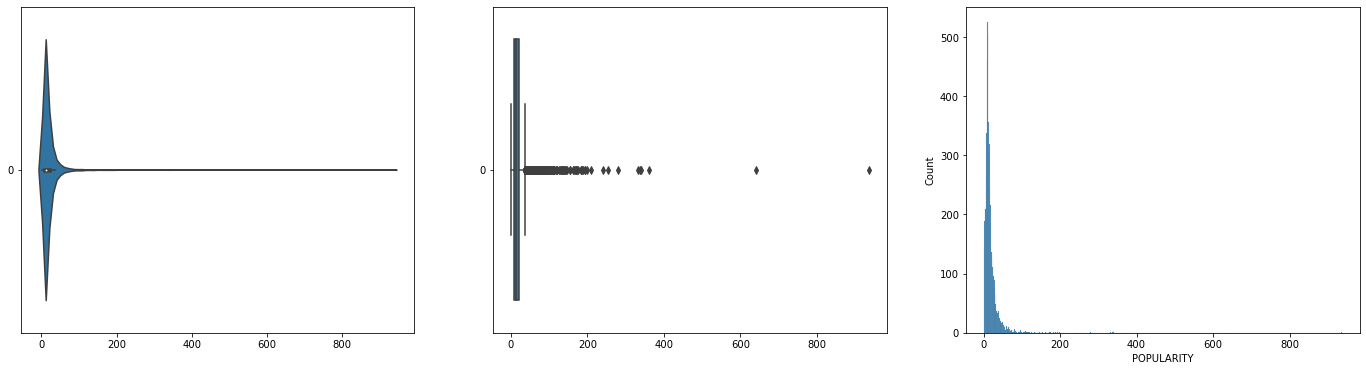

In [18]:
Uni_Variate(movie_data["POPULARITY"])

<AxesSubplot:xlabel='POPULARITY', ylabel='Count'>

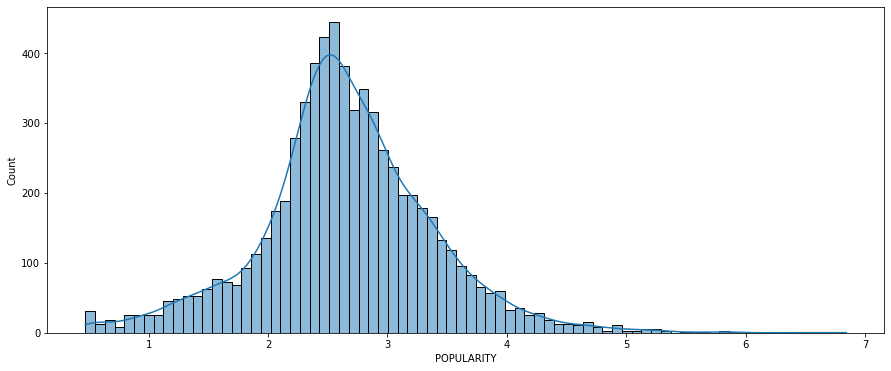

In [19]:
movie_data["POPULARITY"] = np.log(movie_data["POPULARITY"] + 1)

f = plt.figure(figsize=(15,6))

sb.histplot(movie_data["POPULARITY"], kde=True)

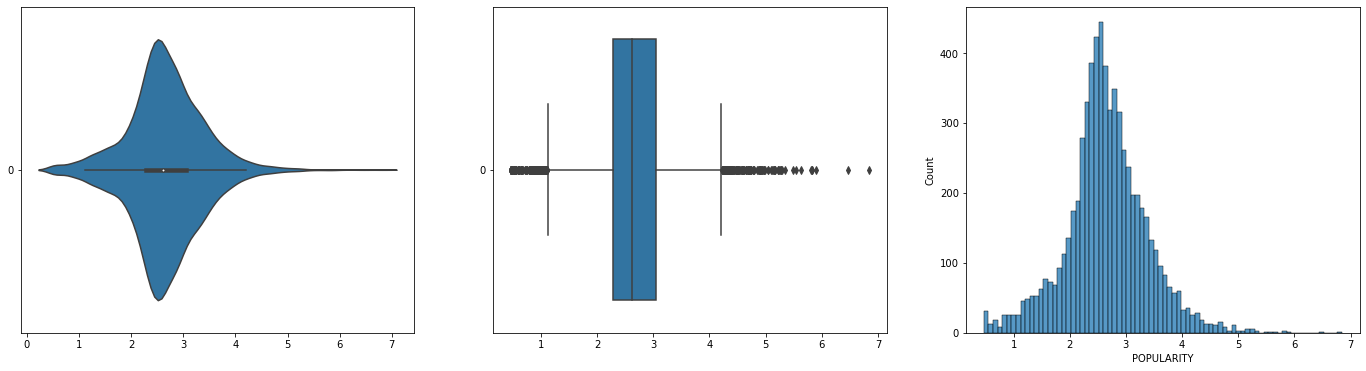

In [20]:
Uni_Variate(movie_data["POPULARITY"])

<Figure size 1728x288 with 0 Axes>

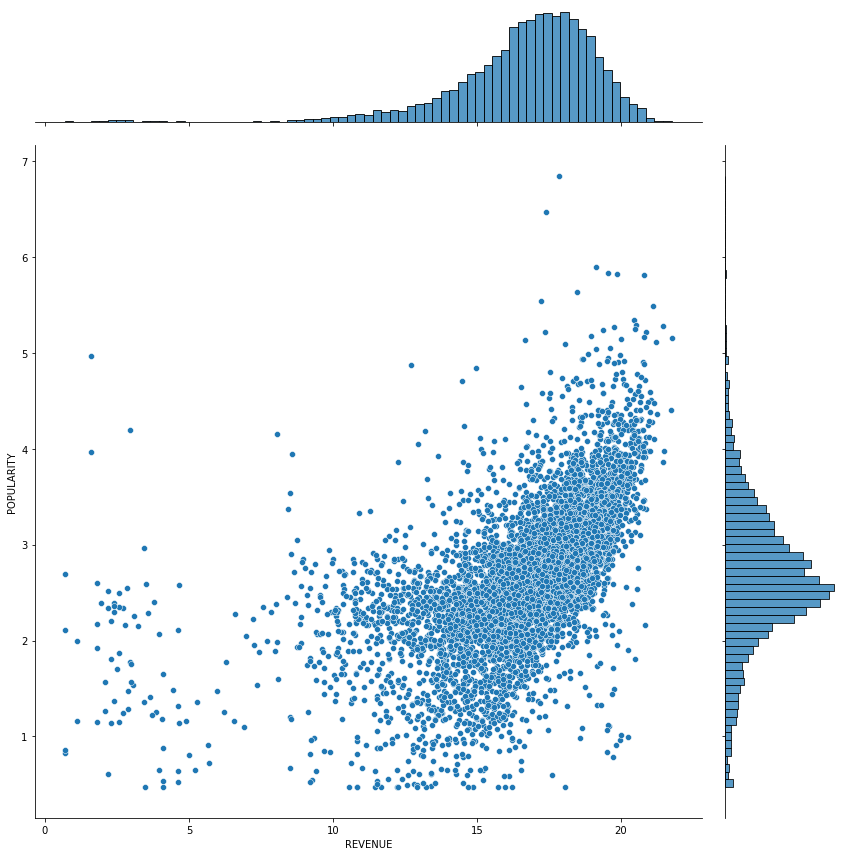

In [21]:
Bi_Variate(movie_data, "REVENUE", "POPULARITY")

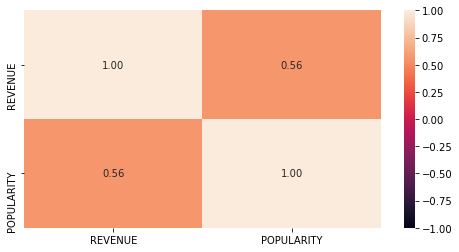

In [22]:
Correlation(movie_data, "REVENUE", "POPULARITY")

LINEAR REGRESSION

In [23]:
# Extract Response and Predictors
y = pd.DataFrame(movie_data['REVENUE'])
X = pd.DataFrame(movie_data['POPULARITY'])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (5000, 1) (5000, 1)
Test Set  : (1667, 1) (1667, 1)


In [24]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [11.10263578]
Coefficients : a =  [[2.07586076]]


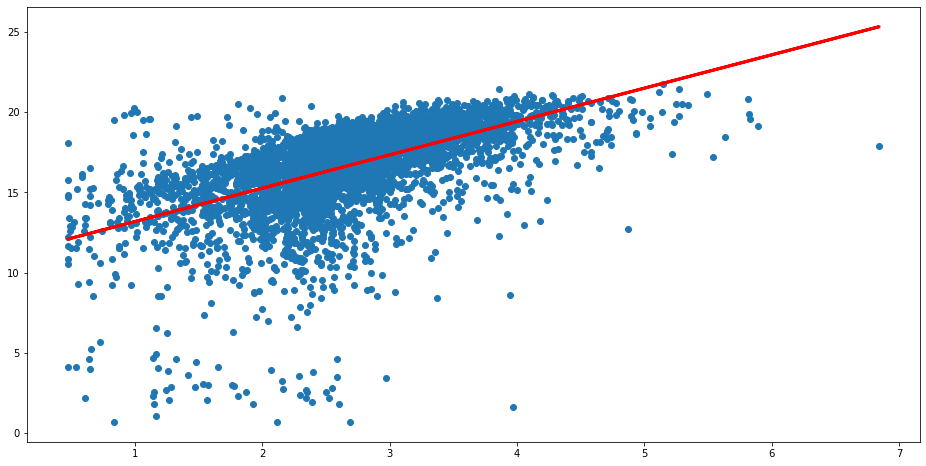

In [25]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [27]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
test_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, test_y_pred))

Explained Variance (R^2) 	: 0.3222025524231511
Mean Squared Error (MSE) 	: 4.749989682737837


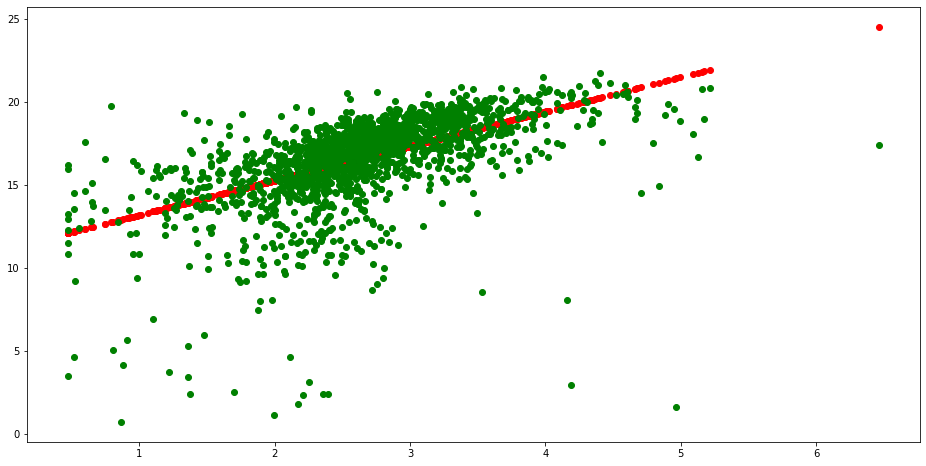

In [28]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()